<a href="https://colab.research.google.com/github/NguyenAnhKietUIT/IS254.O11/blob/main/Downloading_and_Parsing_Wikipedia_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests

# Parsing HTML
from bs4 import BeautifulSoup

# File system management
import os

In [3]:
# Define the base URL for the Wikimedia English Wikipedia dump files
base_url = 'https://dumps.wikimedia.org/enwiki/'

# Send an HTTP GET request to the base URL and store the page content as text
index = requests.get(base_url).text

# Create a BeautifulSoup object to parse the HTML content
soup_index = BeautifulSoup(index, 'html.parser')

# Find all anchor ('<a>') elements in the parsed HTML content
# Filter and extract the 'href' attribute from each anchor element that has one
dumps = [a['href'] for a in soup_index.find_all('a') if a.has_attr('href')]

# The 'dumps' list now contains the extracted 'href' attribute values from
# anchor elements
dumps

['../',
 '20230801/',
 '20230820/',
 '20230901/',
 '20230920/',
 '20231001/',
 '20231020/',
 '20231101/',
 'latest/']

In [4]:
# Create a new URL by appending a specific date ('20231020') to the base URL
dump_url = base_url + '20231020/'

# Send an HTTP GET request to the newly created URL and store the page content as text
dump_html = requests.get(dump_url).text

# The 'dump_html' variable now contains the HTML content of the web page at the specified URL
dump_html

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\n        "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n        <title>enwiki dump progress on 20231020</title>\n        <link rel="stylesheet" type="text/css" href="/dumps.css" />\n        <style type="text/css">\n                .siteinfo {\n                        text-align: center;\n                }\n                li {\n                        list-style-type: none;\n                        padding: 0.5em 1.5em 0.5em 1.5em;\n                        background: #fff;\n                        margin-bottom: 1em;\n                }\n                li li {\n                        background-color: white;\n                        box-shadow: none;\n                        border-top: none;\n                        padding: 0px;\n                        margin-bot

In [5]:
# Create a BeautifulSoup object to parse the HTML content of the 'dump_html' variable
soup_dump = BeautifulSoup(dump_html, 'html.parser')
soup_dump

[<li class="file"><a href="/enwiki/20231020/enwiki-20231020-pages-articles-multistream.xml.bz2">enwiki-20231020-pages-articles-multistream.xml.bz2</a> 21.0 GB</li>,
 <li class="file"><a href="/enwiki/20231020/enwiki-20231020-pages-articles-multistream-index.txt.bz2">enwiki-20231020-pages-articles-multistream-index.txt.bz2</a> 242.9 MB</li>,
 <li class="file"><a href="/enwiki/20231020/enwiki-20231020-pages-articles-multistream1.xml-p1p41242.bz2">enwiki-20231020-pages-articles-multistream1.xml-p1p41242.bz2</a> 261.2 MB</li>,
 <li class="file"><a href="/enwiki/20231020/enwiki-20231020-pages-articles-multistream-index1.txt-p1p41242.bz2">enwiki-20231020-pages-articles-multistream-index1.txt-p1p41242.bz2</a> 221 KB</li>]

In [6]:
# Initialize an empty list to store file information
files = []

# Iterate through all list items ('<li>') with the 'class' attribute set to 'file' in the parsed HTML content
for file in soup_dump.find_all('li', {'class': 'file'}):
    # Extract the text content of the current list item
    text = file.text

    # Check if the text contains the substring 'pages-articles'
    if 'pages-articles' in text:
        # Split the text into a list using spaces as a delimiter
        # The first element will be the file size, and the rest will be file details
        files.append((text.split()[0], text.split()[1:]))

# The 'files' list now contains information about files that match the criteria
files

[('enwiki-20231020-pages-articles-multistream.xml.bz2', ['21.0', 'GB']),
 ('enwiki-20231020-pages-articles-multistream-index.txt.bz2', ['242.9', 'MB']),
 ('enwiki-20231020-pages-articles-multistream1.xml-p1p41242.bz2',
  ['261.2', 'MB']),
 ('enwiki-20231020-pages-articles-multistream-index1.txt-p1p41242.bz2',
  ['221', 'KB']),
 ('enwiki-20231020-pages-articles-multistream2.xml-p41243p151573.bz2',
  ['348.7', 'MB']),
 ('enwiki-20231020-pages-articles-multistream-index2.txt-p41243p151573.bz2',
  ['637', 'KB']),
 ('enwiki-20231020-pages-articles-multistream3.xml-p151574p311329.bz2',
  ['378.9', 'MB']),
 ('enwiki-20231020-pages-articles-multistream-index3.txt-p151574p311329.bz2',
  ['819', 'KB']),
 ('enwiki-20231020-pages-articles-multistream4.xml-p311330p558391.bz2',
  ['422.1', 'MB']),
 ('enwiki-20231020-pages-articles-multistream-index4.txt-p311330p558391.bz2',
  ['1.3', 'MB']),
 ('enwiki-20231020-pages-articles-multistream5.xml-p558392p958045.bz2',
  ['452.5', 'MB']),
 ('enwiki-2023102

In [7]:
# Create a list of file sizes (the first element in each 'files' tuple)
# for files where the filename contains '.xml-p'
files_to_download = [file[0] for file in files if '.xml-p' in file[0]]

# Select the last 5 elements of the 'files_to_download' list
# These represent the file sizes of the 5 most recent files with '.xml-p' in the filename
files_to_download

['enwiki-20231020-pages-articles27.xml-p68475910p69975909.bz2',
 'enwiki-20231020-pages-articles27.xml-p69975910p71475909.bz2',
 'enwiki-20231020-pages-articles27.xml-p71475910p72975909.bz2',
 'enwiki-20231020-pages-articles27.xml-p72975910p74475909.bz2',
 'enwiki-20231020-pages-articles27.xml-p74475910p75105778.bz2']

In [8]:
!pip install keras

In [9]:
import sys
from keras.utils import get_file

keras_home = '/content/drive/MyDrive/Data/'

In [15]:
# Initialize empty lists to store data paths and file information
data_paths = []
file_info = []

# Iterate through each file in the 'files_to_download' list
for file in files_to_download:
    # Create a full file path by concatenating 'keras_home' and the file name
    path = keras_home + file
    
    # Check to see if the file exists at the specified path (if it's already downloaded)
    if not os.path exists(path):
        # Print a message indicating that the file is being downloaded
        print('Downloading')
        
        # Append the downloaded file path to the 'data_paths' list using 'get_file' function
        data_paths.append(get_file(file, dump_url, cache_subdir=keras_home))
        
        # Find the file size in megabytes and store it in 'file_size'
        file_size = os.stat(path).st_size / 1e6
        
        # Calculate the number of articles in the file by parsing the filename
        file_articles = int(file.split('p')[-1].split('.')[-2]) - int(file.split('p')[-2])
        
        # Append the file information (file name, file size, and number of articles) to 'file_info' list
        file_info.append((file, file_size, file_articles))
        
    # If the file is already downloaded, find some information about it
    else:
        # Append the file path to the 'data_paths' list
        data_paths.append(path)
        
        # Find the file size in megabytes and store it in 'file_size'
        file_size = os.stat(path).st_size / 1e6
        
        # Calculate the number of articles in the file by parsing the filename
        file_number = int(file.split('p')[-1].split('.')[-2]) - int(file.split('p')[-2])
        
        # Append the file information (file name, file size, and number of articles) to 'file_info' list
        file_info.append((file.split('-')[-1], file_size, file_number))

In [16]:
sorted(file_info, key=lambda x: x[1], reverse=True)

[('p1p41242.bz2', 0.090857, 41241),
 ('p41243p151573.bz2', 0.090857, 110330),
 ('p151574p311329.bz2', 0.090857, 159755),
 ('p311330p558391.bz2', 0.090857, 247061),
 ('p558392p958045.bz2', 0.090857, 399653)]

In [17]:
sorted(file_info, key=lambda x: x[2], reverse=True)

[('p5399367p6899366.bz2', 0.090857, 1499999),
 ('p7054860p8554859.bz2', 0.090857, 1499999),
 ('p9172789p10672788.bz2', 0.090857, 1499999),
 ('p11659683p13159682.bz2', 0.090857, 1499999),
 ('p14324603p15824602.bz2', 0.090857, 1499999)]

In [18]:
print(f'There are {len(file_info)} partitions.')

There are 130 partitions.


<Axes: xlabel='file'>

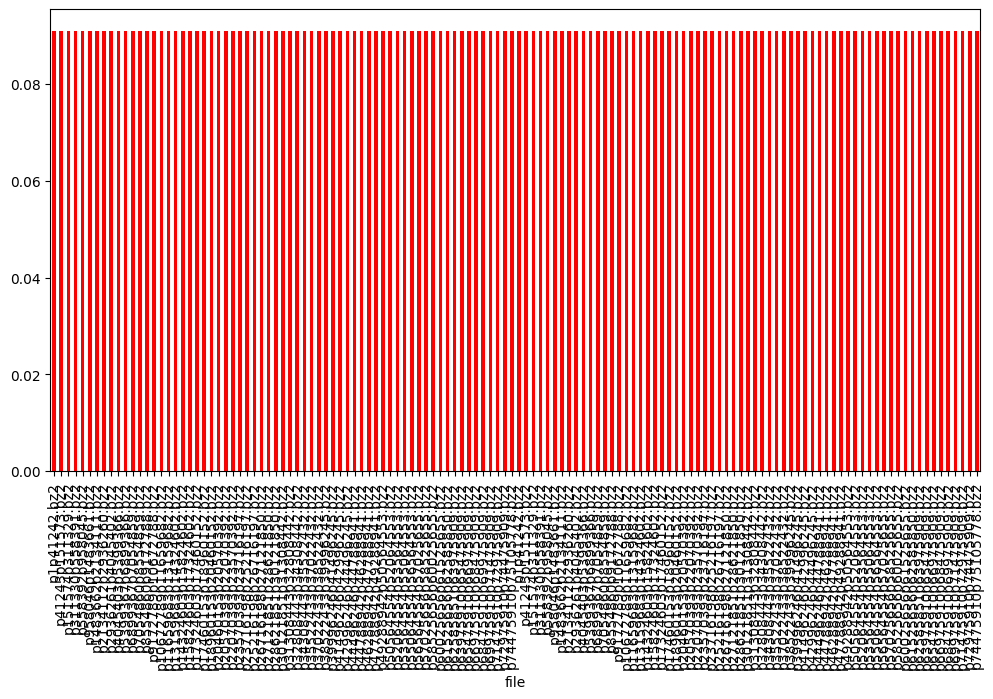

In [19]:
# Import the pandas library as 'pd' and the matplotlib library as 'plt'
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting in the Jupyter Notebook (if running in a Jupyter environment)
%matplotlib inline

# Create a DataFrame 'file_df' from the 'file_info' list, specifying column names
# and set the 'file' column as the index
file_df = pd.DataFrame(file_info, columns=['file', 'size (MB)', 'articles']).set_index('file')

# Create a bar plot of the 'size (MB)' column in the DataFrame
# Using a red color and specifying the figure size
file_df['size (MB)'].plot.bar(color='red', figsize=(12, 6))

In [ ]:
print(f"The total size of files on disk is {file_df['size (MB)'].sum() / 1e3} GB")

In [ ]:
# Import the 'bz2' module to work with BZ2-compressed files
import bz2

# Import the 'subprocess' module for running external commands
import subprocess

# Select a specific data path (in this case, the 16th element of the 'data_paths' list)
data_path = data_paths[15]

# The 'data_path' variable now contains the path to the selected data file
data_path

In [ ]:
# Measure the execution time of the following code block using the %%timeit magic command
# Run the code block 3 times with a repeat of 3 and collect timing information
%%timeit -n 3 -r 3

# Initialize an empty list to store lines from the BZ2-compressed file
lines = []

# Iterate over the lines in the BZ2-compressed file using the 'bz2.BZ2File' object
# and append each line to the 'lines' list
# Break the loop if more than 1 million lines have been processed
for i, line in enumerate(bz2.BZ2File(data_path, 'r')):
    lines.append(line)
    if i > 1e6:
        break

In [ ]:
%%timeit -n 3 -r 3

# Initialize an empty list to store lines
lines = []

# Iterate over lines in a BZ2-compressed file using the 'bzcat' command executed via 'subprocess'
# Append each line to the 'lines' list
# Break the loop if more than 1 million lines have been processed
for i, line in enumerate(subprocess.Popen(['bzcat'], 
                         stdin=open(data_path), 
                         stdout=subprocess.PIPE).stdout):
    lines.append(line)
    if i > 1e6:
        break

In [ ]:
import xml.sax

class WikiXmlHandler(xml.sax.handler.ContentHandler):
    """Content handler for Wiki XML data using SAX"""
    
    def __init__(self):
        # Constructor to initialize the handler
        xml.sax.handler.ContentHandler.__init__(self)
        self._buffer = None
        self._values = {}
        self._current_tag = None
        self._pages = []

    def characters(self, content):
        """Characters between opening and closing tags"""
        # Called when characters are encountered between opening and closing tags
        # If the current tag is being processed, append the content to the buffer
        if self._current_tag:
            self._buffer.append(content)

    def startElement(self, name, attrs):
        """Opening tag of element"""
        # Called when an opening tag is encountered
        # If the tag is 'title,' 'text,' or 'timestamp,' set it as the current tag
        # and create a buffer to collect the content
        if name in ('title', 'text', 'timestamp'):
            self._current_tag = name
            self._buffer = []

    def endElement(self, name):
        """Closing tag of element"""
        # Called when a closing tag is encountered
        # If the closing tag matches the current tag, join the content from the buffer
        # and store it in the values dictionary
        if name == self._current_tag:
            self._values[name] = ' '.join(self._buffer)

        # If the closing tag is 'page,' it means the end of a page element
        # Store the collected 'title' and 'text' in the pages list as a tuple
        if name == 'page':
            self._pages.append((self._values['title'], self._values['text']))

In [ ]:
# Create an instance of the WikiXmlHandler class
handler = WikiXmlHandler()

# Create a SAX parser
parser = xml.sax.make_parser()

# Set the content handler for the parser as the 'handler' instance
parser.setContentHandler(handler)

# Access the '_pages' attribute of the 'handler' instance (empty list at this point)
handler._pages

In [ ]:
# Create an instance of the WikiXmlHandler class for handling XML data
handler = WikiXmlHandler()

# Create a SAX parser
parser = xml.sax.make_parser()

# Set the content handler for the parser as the 'handler' instance
parser.setContentHandler(handler)

# Initialize a loop to read lines from the BZ2-compressed file using 'bzcat' via subprocess
for i, line in enumerate(subprocess.Popen(['bzcat'], 
                     stdin=open(data_path), 
                     stdout=subprocess.PIPE).stdout):
    # Feed each line to the parser for XML processing
    parser.feed(line)
    
    # Stop the loop when 3 articles have been found and processed
    if len(handler._pages) > 2:
        break

# Print the titles of the 3 articles found
print([x[0] for x in handler._pages])

In [ ]:
# Create an instance of the WikiXmlHandler class for handling XML data
handler = WikiXmlHandler()

# Create a SAX parser
parser = xml.sax.make_parser()

# Set the content handler for the parser as the 'handler' instance
parser.setContentHandler(handler)

# Initialize a loop to read lines from the BZ2-compressed file using 'bzcat' via subprocess
for i, line in enumerate(subprocess.Popen(['bzcat'], 
                     stdin=open(data_path), 
                     stdout=subprocess.PIPE).stdout):
    # Feed each line to the parser for XML processing
    parser.feed(line)
    
    # Stop the loop when 50 articles have been found and processed
    if len(handler._pages) > 50:
        break

In [ ]:
# Import the 'mwparserfromhell' library for parsing MediaWiki text
import mwparserfromhell

In [ ]:
# Print the title of the 7th article (index 6) from the handler's pages
print(handler._pages[6][0])

# Parse the wikitext of the 7th article using 'mwparserfromhell.parse' and store it in the 'wiki' variable
wiki = mwparserfromhell.parse(handler._pages[6][1])
wiki

In [ ]:
# Extract wikilinks from the parsed wikitext and store them in the 'wikilinks' list
wikilinks = [x.title for x in wiki.filter_wikilinks()]

# Print the number of wikilinks found
print(f'There are {len(wikilinks)} wikilinks.')

# Print the list of wikilinks
wikilinks

In [ ]:
# Extract argument strings from templates in the parsed wikitext and print them
arguments = wiki.filter_arguments()
arguments

In [ ]:
# Extract comments from the parsed wikitext and store them in the 'comments' list
comments = wiki.filter_comments()
comments

In [ ]:
# Extract external links (titles and URLs) from the parsed wikitext and store them in the 'external_links' list
external_links = [(x.title, x.url) for x in wiki.filter_external_links()]

# Print the number of external links found
print(f'There are {len(external_links)} external links.')

# Print the list of external links (titles and URLs)
external_links

In [ ]:
# Use the 'wiki.filter()' method to search for the text pattern 'contemporary' within the parsed wikitext
contemporary = wiki.filter(matches='contemporary')

# Print the second matching element and its data type
print(contemporary[1], type(contemporary[1]))

In [ ]:
# Remove all wiki markup and leading/trailing white spaces from the parsed content
stripped_content = wiki.strip_code().strip()
stripped_content

In [ ]:
# Extract templates from the parsed wikitext and store them in the 'templates' list
templates = wiki.filter_templates()

# Print the number of templates found
print(f'There are {len(templates)} templates.')

# Iterate over each template and print its name
for template in templates:
    print(template.name)

In [ ]:
# Use the 'wiki.filter_templates()' method to extract templates from the parsed wikitext
# and filter for templates that match the name 'Infobox radio station'
infobox = wiki.filter_templates(matches='Infobox radio station')[0]
infobox

In [ ]:
# Extract information from the parameters of the 'infobox' template
# Create a dictionary where parameter names are keys and their values are values
information = {param.name.strip_code().strip(): param.value.strip_code().strip() for param in infobox.params}
information

In [ ]:
import re

def process_article(title, text, timestamp, template = 'Infobox book'):
    """Process a wikipedia article looking for template"""
    
    # Create a parsing object
    wikicode = mwparserfromhell.parse(text)
    
    # Search through templates for the template
    matches = wikicode.filter_templates(matches = template)
    
    # Filter out errant matches
    matches = [x for x in matches if x.name.strip_code().strip().lower() == template.lower()]
    
    if len(matches) >= 1:
        # template_name = matches[0].name.strip_code().strip()

        # Extract information from infobox
        properties = {param.name.strip_code().strip(): param.value.strip_code().strip() 
                      for param in matches[0].params
                      if param.value.strip_code().strip()}

        # Extract internal wikilinks
        wikilinks = [x.title.strip_code().strip() for x in wikicode.filter_wikilinks()]

        # Extract external links
        exlinks = [x.url.strip_code().strip() for x in wikicode.filter_external_links()]

        # Find approximate length of article
        text_length = len(wikicode.strip_code().strip())

        return (title, properties, wikilinks, exlinks, timestamp, text_length)

In [ ]:
r = process_article('KENZ (FM)', wiki, None)
r

In [ ]:
r = process_article('KENZ (FM)', wiki, None, template = 'Infobox radio station')
r[0], r[1]

In [ ]:
import xml.sax

class WikiXmlHandler(xml.sax.handler.ContentHandler):
    """Parse through XML data using SAX"""
    
    def __init__(self):
        # Constructor to initialize the handler
        xml.sax.handler.ContentHandler.__init__(self)
        self._buffer = None
        self._values = {}
        self._current_tag = None
        self._books = []  # List to store information about books
        self._article_count = 0
        self._non_matches = []  # List to store non-matching articles

    def characters(self, content):
        """Characters between opening and closing tags"""
        if self._current_tag:
            self._buffer.append(content)

    def startElement(self, name, attrs):
        """Opening tag of element"""
        if name in ('title', 'text', 'timestamp'):
            self._current_tag = name
            self._buffer = []

    def endElement(self, name):
        """Closing tag of element"""
        if name == self._current_tag:
            self._values[name] = ' '.join(self._buffer)

        if name == 'page':
            self._article_count += 1
            # Search through the page to see if the page is a book using 'process_article'
            book = process_article(**self._values, template='Infobox book')
            # Append the book information to the list of books
            if book:
                self._books.append(book)
            else:
                self._non_matches.append(self._values['title'])

In [ ]:
# Create an instance of the WikiXmlHandler class for handling XML data
handler = WikiXmlHandler()

# Create a SAX parser and set the content handler to the 'handler' instance
parser = xml.sax.make_parser()
parser.setContentHandler(handler)

# Initialize a loop to read lines from a BZ2-compressed file using 'bzcat' via subprocess
for i, line in enumerate(subprocess.Popen(['bzcat'], 
                         stdin=open(data_path), 
                         stdout=subprocess.PIPE).stdout):
    # Feed each line to the parser for XML processing
    parser.feed(line)
    
    # Stop the loop when 3 books have been found
    if len(handler._books) > 2:
        break

# Print the total number of articles searched to find 3 books
print(f'Searched through {handler._article_count} articles to find 3 books.')

In [ ]:
handler._books[0]

In [ ]:
# Check if the uncompressed file does not already exist
if not os.path.exists('/home/ubuntu/.keras/datasets/p15.xml'):
    # Use subprocess to execute a shell command for decompression
    subprocess.call(['bzcat /home/ubuntu/.keras/datasets/enwiki-20180901-pages-articles15.xml-p7744803p9244803.bz2 >> p15.xml'],
                    shell=True)
else:
    # Print a message if the file is already uncompressed
    print('Already uncompressed')

In [ ]:
!wc /home/ubuntu/.keras/datasets/p15.xml

In [ ]:
from timeit import default_timer as timer

# Record the start time
start = timer()

# Create an instance of the WikiXmlHandler class for handling XML data
handler = WikiXmlHandler()

# Create a SAX parser and set the content handler to the 'handler' instance
parser = xml.sax.make_parser()
parser.setContentHandler(handler)

# Initialize a loop to read lines from a BZ2-compressed file using 'bzcat' via subprocess
for i, line in enumerate(subprocess.Popen(['bzcat'], 
                         stdin=open(data_path), 
                         stdout=subprocess.PIPE).stdout):
    if (i + 1) % 10000 == 0:
        # Print progress every 10,000 lines
        print(f'Processed {i + 1} lines so far.', end='\r')
    try:
        # Feed each line to the parser for XML processing
        parser.feed(line)
    except StopIteration:
        # Stop parsing when the process is completed
        break

# Record the end time
end = timer()
books = handler._books

# Print the total number of articles searched and the number of books found
print(f'\nSearched through {handler._article_count} articles.')
print(f'Found {len(books)} books in {round(end - start)} seconds.')

In [ ]:
import json

In [ ]:
# Define the path to the output JSON file
output_file_path = '../data/p15_books.ndjson'

# Save the list of books to the JSON file
with open(output_file_path, 'wt') as fout:
    for book in books:
        # Write each book as a JSON object on a separate line
        fout.write(json.dumps(book) + '\n')

In [ ]:
# Define the path to the input JSON file
input_file_path = '../data/p15_books.ndjson'

# Initialize a list to store the books read from the JSON file
books_in = []

# Read in the list of books from the JSON file
with open(input_file_path, 'rt') as fin:
    for line in fin.readlines():
        # Parse each line as a JSON object and append it to the 'books_in' list
        books_in.append(json.loads(line))

In [ ]:
books_in[10]

In [ ]:
import gc

In [ ]:
def find_books(data_path, limit=None, save=True):
    """Find all the book articles from a compressed Wikipedia XML dump.
       `limit` is an optional argument to only return a set number of books.
        If save is True, books are saved to partition directories based on the file name"""

    # Object for handling XML
    handler = WikiXmlHandler()

    # Parsing object
    parser = xml.sax.make_parser()
    parser.setContentHandler(handler)

    # Iterate through the compressed file
    for i, line in enumerate(subprocess.Popen(['bzcat'], 
                         stdin=open(data_path), 
                         stdout=subprocess.PIPE).stdout):
        try:
            # Feed each line to the parser for XML processing
            parser.feed(line)
        except StopIteration:
            break
            
        # Optional limit
        if limit is not None and len(handler._books) >= limit:
            return handler._books
    
    if save:
        # Define the directory where partitioned JSON files will be saved
        partition_dir = '/data/wiki/partitions/'

        # Create a file name based on the partition name
        p_str = data_path.split('-')[-1].split('.')[-2]
        out_dir = partition_dir + f'{p_str}.ndjson'

        # Open the file
        with open(out_dir, 'w') as fout:
            # Write the books as JSON objects, each on a separate line
            for book in handler._books:
                fout.write(json.dumps(book) + '\n')
        
        print(f'{len(os.listdir(partition_dir))} files processed.', end='\r')

    # Memory management
    del handler
    del parser
    gc.collect()
    return None

In [ ]:
# Create a list of file paths for partitioned Wikipedia XML dump files
partitions = [keras_home + file for file in os.listdir(keras_home) if 'xml-p' in file]

# Get the number of partitions
num_partitions = len(partitions)

# Get the file path of the last partition (if any)
last_partition = partitions[-1]

# Print the number of partitions and the file path of the last partition
print(f'Number of partitions found: {num_partitions}')
print(f'File path of the last partition: {last_partition}')

In [ ]:
from multiprocessing import Pool 
import tqdm 

# List of lists to single list
from itertools import chain

# Sending keyword arguments in map
from functools import partial

In [ ]:
os.cpu_count()

In [ ]:
# Import the multiprocessing library
from multiprocessing import Pool

# Create a pool of 16 workers to execute processes in parallel
pool = Pool(processes=16)

# Record the start time
start = timer()

# Map (service, tasks) to apply the 'find_books' function to each partition
results = pool.map(find_books, partitions)

# Close the pool of workers
pool.close()

# Wait for all processes to complete
pool.join()

# Record the end time
end = timer()

# Print the total time elapsed for the parallel processing
print(f'{end - start} seconds elapsed.')

In [ ]:
def read_data(file_path):
    """Read in JSON data from `file_path` and return it as a list of objects."""
    
    # Initialize an empty list to store the JSON data
    data = []
    
    # Open the file in read mode and load JSON objects line by line
    with open(file_path, 'r') as fin:
        for line in fin.readlines():
            # Parse each line as a JSON object and append it to the 'data' list
            data.append(json.loads(line))
            
    # Return the list of JSON objects
    return data

In [ ]:
# Import necessary modules
from multiprocessing.dummy import Pool as Threadpool
from itertools import chain

# Record the start time
start = timer()

# List of file paths to read in
saved_files = ['/data/wiki/partitions/' + x for x in os.listdir('/data/wiki/partitions/')]

# Create a thread pool with 10 worker threads for reading files in parallel
threadpool = Threadpool(processes=10)

# Read in the files as a list of lists using the thread pool
results = threadpool.map(read_data, saved_files)

# Flatten the list of lists into a single list using itertools.chain
book_list = list(chain(*results))

# Record the end time
end = timer()

# Print the number of books found and the time elapsed
print(f'Found {len(book_list)} books in {round(end - start)} seconds.')

In [ ]:
# Check if the file 'found_books_filtered.ndjson' does not exist in the current directory
if not os.path.exists(os.getcwd() + '../data/found_books_filtered.ndjson'):
    # If the file doesn't exist, create it and save the book_list in JSON format
    with open('../data/found_books_filtered.ndjson', 'wt') as fout:
        for book in book_list:
             fout.write(json.dumps(book) + '\n')
    print('Books saved.')
else:
    # If the file already exists, print a message indicating that it's already saved
    print('Files already saved.')

In [ ]:
def test_speed(pool):
    """Time how long it takes to find books in Wikipedia XML dump partitions."""

    # Record the start time
    start = timer()

    # Define a partial function to pass in the 'limit' and 'save' arguments
    map_find_books = partial(find_books, limit=10, save=False)

    # Initialize a list to store results
    results = []

    # Display a progress bar with tqdm
    for x in tqdm.tqdm_notebook(pool.imap_unordered(map_find_books, partitions), total=len(partitions)):
        results.append(x)

    # Close the pool of workers
    pool.close()
    pool.join()

    # Record the end time
    end = timer()

    # Flatten the list of results into a single list
    book_list = list(chain(*results))

    # Print the number of books found and the time taken
    print(f'Found {len(book_list)} books in {round(end - start)} seconds.')

In [ ]:
pool = Pool(processes = 8)
test_speed(pool)

In [ ]:
pool = Pool(processes = 16)
test_speed(pool)

In [ ]:
# Import the ThreadPool class from the multiprocessing.dummy module
from multiprocessing.dummy import Pool as ThreadPool

# Create a thread pool with 10 worker threads
thread_pool = ThreadPool(processes=10)

# Call the test_speed function to measure the time it takes to find books
test_speed(thread_pool)

In [ ]:
thread_pool = ThreadPool(processes = 20)
test_speed(thread_pool)